<a href="https://colab.research.google.com/github/royheyer/Easy_Visa/blob/main/Easy_Visa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EasyVisa Project**

**Context:**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

**Objective:**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.
Data Description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

case_id: ID of each visa application
continent: Information of continent the employee
education_of_employee: Information of education of the employee
has_job_experience: Does the employee has any job experience? Y= Yes; N = No
requires_job_training: Does the employee require any job training? Y = Yes; N = No
no_of_employees: Number of employees in the employer's company
yr_of_estab: Year in which the employer's company was established
region_of_employment: Information of foreign worker's intended region of employment in the US.
prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
case_status: Flag indicating if the Visa was certified or denied

In [ ]:
#Function to import Google my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Function imports csv file for a dataframe
from google.colab import files
uploaded = files.upload()

Saving EasyVisa.csv to EasyVisa (2).csv


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# Set limits on number of displayed columns and rows
pd.set_option("display.max_columns", None)  # no maximum limit
pd.set_option("display.max_rows", 200)  # maximum of 200 rows


# Library for building and showing decision tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Library for Bagging ensemble technique
from sklearn.ensemble import BaggingClassifier

# Library for Random Forest ensemble technique
from sklearn.ensemble import RandomForestClassifier

# Library for AdaBoost ensemble technique
from sklearn.ensemble import AdaBoostClassifier

# Library for Gradient Boosting ensemble technique
from sklearn.ensemble import GradientBoostingClassifier

# Library for XGBoost ensemble technique
from xgboost import XGBClassifier

# Library for Stacking ensemble technique
from sklearn.ensemble import StackingClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# Libraries for calculating different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    make_scorer,
    confusion_matrix,
)

#libraries for metrics and statistics
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Function defines a dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['EasyVisa.csv']))

In [ ]:
#Format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded off to 2 decimal places

**Data Overview**

 Sanity checks and Observations

In [ ]:
#Print first five rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified


In [ ]:
#Print last five rows
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
#Function to view a random sample of the data for better observation
data.sample(n=10, random_state=1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.91,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.98,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.29,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.80,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.19,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.73,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.39,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.04,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.02,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.83,Hour,Y,Denied


In [ ]:
#Print the data types of the columns within the datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# Print size of data frame
print(
    f"There are {data.shape[0]} rows and {data.shape[1]} columns in the original data frame."
)

There are 25480 rows and 12 columns in the original data frame.



**Observations: **

   1. There are 12 column names and do not need modification.
   2. The column case_id could be removed, since it does not contain any data usable in the prediction models.
   3. The values in the columns has_job_experience, requires_job_training, and full_time_poistion are Y or N, and could be encoded as 1 and 0, respectively.
   4. The education levels stored in the column education_of_employee could be replaced with integer values. I.e. 1-High School, 2-Bachelor's , 3-Masters, 4-Doctorat.






In [ ]:
# Check for duplicate rows
dplct_no = data.duplicated().sum()
print(f"There are {dplct_no} duplicate rows in the data.")

There are 0 duplicate rows in the data.



**Observations**

   1. Considering that the total of rows is 25480, none of the columns have null/missing values.
   2. Among the 11 columns of data,  3 are numeric type and the remaining 8 are of non-numeric type.

        Numeric:
            Integer: no_of_employees and yr_of_estab
            Float: prevailing_wage
        Non-numeric:
            Object: case_id, continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position, and case_status
3. We should convert the object type columns to categories, which reduces the memory required to store the dataframe.


In [ ]:
#Convert all columns with dtype object into category
for col in data.columns[data.dtypes=='object']:
    data[col] = data[col].astype('category')

In [ ]:
#Drop the column *case_id* from the dataframe
data.drop(labels='case_id', axis=1, inplace=True)

In [ ]:
#Confirm conversions and dropped variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


# Observations:
1. The memory required to store the dataframe is now almost 800kB, a third the size of the original dataframe.

In [ ]:
# Check statistical summary of numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00,5667.04,22877.93,-26.00,1022.00,2109.00,3504.00,602069.00
yr_of_estab,25480.00,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
prevailing_wage,25480.00,74455.81,52815.94,2.14,34015.48,70308.21,107735.51,319210.27



# Observations

1. The mean and median values of no_of_employees are 5667 and 2109, respectively, implying a right-skewed distribution.
2. The maximum value of no_of_employees is above 600000.
3. The minimum value of no_of_employees is -26,which is unreasonable.
4. The oldest and newest employers have been established since (yr_of_estab =) 1800 and 2016, respectively.
5. The distribution of prevailing_wage is difficult to interpret at this point, because its unit varies a lot.



# Exploratory Data Analysis (EDA)

In [ ]:
#Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(16, 6), kde=False, bins=None, hue=None):
    """
    Combines boxplot and histogram

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (16,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True,
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter",
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
#Function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5), cmap='viridis')
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    ax = sns.countplot(
        data=data,
        x=feature,
        palette='viridis',
        order=order,
        hue=feature_2,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot



# Leading Questions:

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?



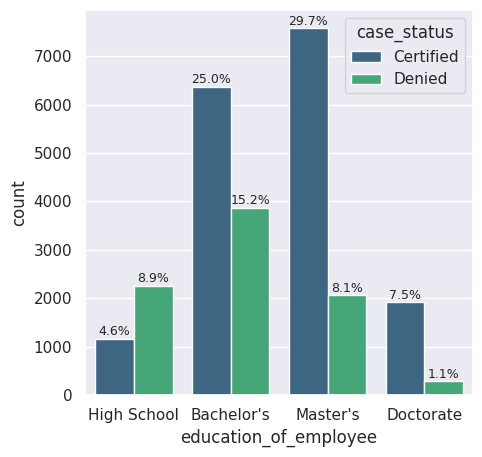

In [ ]:
#Create a plot of group data by education_of_employee and count the numbers of each case_status for each category
labeled_barplot(data,'education_of_employee','case_status', order=["High School","Bachelor's","Master's","Doctorate"], perc=True)

# Observations:
1. As the graph aboves shows, the ratio of applications being certified versus denied increases considerably as an applicant's level of education increases.
2. The ratio of an applicant with a high school diploma being approved versus denied is 1:2, whereas the same ratio for an applicant with a doctorate is 7:1.



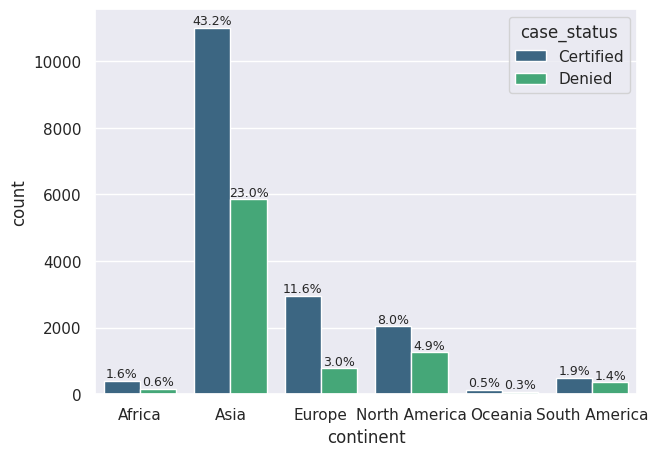

In [ ]:
#Create a plot of group data by continent and count the numbers of each case_status for each category
labeled_barplot(data,'continent','case_status', order=None, perc=True)

# Observarions:
1. Applicants from Asia comprise about 2/3 of all applications and these applicants have aproximately a 2:1 ratio of approvals to denials.
2. An application from a European applicant has the best ratio of approvals to denials 4:1.



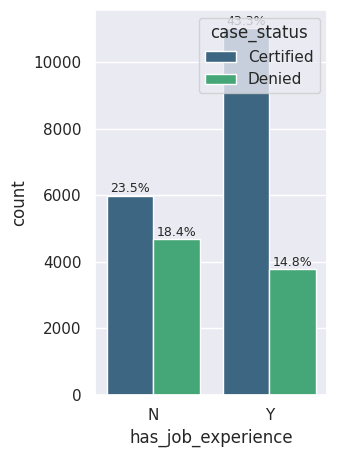

In [ ]:
#Create a plot of the group data by has_job_experience and count the numbers of each case_status for each category
labeled_barplot(data,'has_job_experience','case_status', order=None, perc=True)

# Observations:
1. Applicants with job experience have a ratio of approved to denied applications of 3:1, whereas the same ratio for applicants without job experience have around a 5:4 ratio.

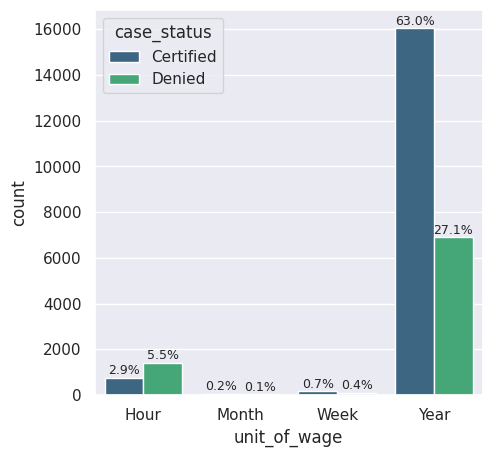

In [ ]:
#Create a plot of group data by unit_of_wage and count the numbers of each case_status for each category
labeled_barplot(data,'unit_of_wage','case_status', order=None, perc=True)

Observations:
1. Applicants who are applying to work in a job with an hourly rate have a ratio of approved versus denied applications of 1:2. Additionally, these applicants comprise only 8% of all applications, but comprise 17% of all denials.
2. Applicants from any other unit_of_wage category have a ratio of 2:1, with applications for jobs with annual salaries showing nearly a 2.5:1 ratio of approvals to denials.



# Data Preprocessing

1. Missing value treatment (if needed)
2. Feature engineering
3. Outlier detection and treatment (if needed)
4. Preparing data for modeling
5. Any other preprocessing steps (if needed)


In [ ]:
#May need to create copy reevaluate before submission
df = data.copy()

**1. Treatment of Missing Values**

In [ ]:
#Identify rows with non-positive no_of_employees
neg_employee_no_rows = data.no_of_employees <= 0

# Print number of rows with non-positive no_of_employees
print(
    f'There are {neg_employee_no_rows.sum()} rows with non-positive number of employees.'
)

#Replace negative values in column no_of_employees with its median
data.loc[neg_employee_no_rows, 'no_of_employees'] = data.no_of_employees.median()

#Double-check minimum value of no_of_employees
print(f'The new minimum number of employees is {data.no_of_employees.min()}.')



There are 33 rows with non-positive number of employees.
The new minimum number of employees is 12.


In [ ]:
data.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.91,Year,Y,Certified
23951,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.98,Year,Y,Certified
8625,Asia,Master's,N,N,2635,2005,South,887.29,Hour,Y,Certified
20206,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.80,Year,Y,Certified
7471,Europe,Bachelor's,Y,N,4681,1928,West,49865.19,Year,Y,Denied
3433,Asia,Bachelor's,Y,N,222,1989,South,813.73,Hour,Y,Certified
24440,Europe,High School,N,Y,3278,1994,South,204948.39,Year,Y,Denied
12104,Asia,Master's,Y,N,1359,1997,West,202237.04,Year,N,Certified
15656,Asia,Bachelor's,N,N,2081,2003,West,111713.02,Year,Y,Denied
23110,North America,Bachelor's,Y,N,854,1998,Northeast,444.83,Hour,Y,Denied


**2. Feature Engineering**

  The feature yr_of_estab is converted to yrs_since_estab, containing the years since establishment. Also, to make the prevailing wages column  interpretable across the rows, they are all transformed into an equivalent hourly wage and are saved in a new column, hourly_wage.

In [ ]:
#Add a new column, yrs_since_estab, including years since establishment - final year is 2016, when data is gathered
data['yrs_since_estab'] = 2016 - data.yr_of_estab

#Drop yr_of_estab column
data.drop('yr_of_estab', axis=1, inplace=True)

#Create a column including equivalent hourly wages - ASSUMING:
# One year = 2080 work-hours
# One month = 173 work-hours
# One week = 40 work-hours
data["hourly_wage"] = data["prevailing_wage"]
data.loc[data.unit_of_wage == "Year", "hourly_wage"] = (
    data.loc[data.unit_of_wage == "Year", "hourly_wage"] / 2080.0
)
data.loc[data.unit_of_wage == "Month", "hourly_wage"] = (
    data.loc[data.unit_of_wage == "Month", "hourly_wage"] / 173.0
)
data.loc[data.unit_of_wage == "Week", "hourly_wage"] = (
    data.loc[data.unit_of_wage == "Week", "hourly_wage"] / 40.0
)

#Drop prevailing_wage column
data.drop("prevailing_wage", axis=1, inplace=True)

#Check sample rows of updated data
data.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_since_estab,hourly_wage
17639,Asia,Bachelor's,Y,N,567,Midwest,Year,Y,Certified,24,12.91
23951,Oceania,Bachelor's,N,N,619,Midwest,Year,Y,Certified,78,31.93
8625,Asia,Master's,N,N,2635,South,Hour,Y,Certified,11,887.29
20206,Asia,Bachelor's,Y,Y,3184,Northeast,Year,Y,Certified,30,23.77
7471,Europe,Bachelor's,Y,N,4681,West,Year,Y,Denied,88,23.97
3433,Asia,Bachelor's,Y,N,222,South,Hour,Y,Certified,27,813.73
24440,Europe,High School,N,Y,3278,South,Year,Y,Denied,22,98.53
12104,Asia,Master's,Y,N,1359,West,Year,N,Certified,19,97.23
15656,Asia,Bachelor's,N,N,2081,West,Year,Y,Denied,13,53.71
23110,North America,Bachelor's,Y,N,854,Northeast,Hour,Y,Denied,18,444.83


In [ ]:
#Check statistical summary of numeric data in updated data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00,5669.80,22877.37,12.00,1028.00,2109.00,3504.00,602069.00
yrs_since_estab,25480.00,36.59,42.37,0.00,11.00,19.00,40.00,216.00
hourly_wage,25480.00,94.90,278.18,0.05,22.65,39.83,60.01,7004.40


# Observations:
1. The mean and median values of yrs_since_estab are 37 and 19 years.
2. The oldest employer was established 216 years before the data collection.
3. The minimum and maximum values of hourly_wage are $0.05 and $7004 so the variation of this variable is very large.
4. The mean hourly wage is $95.

3. **Outlier detection and treatment**

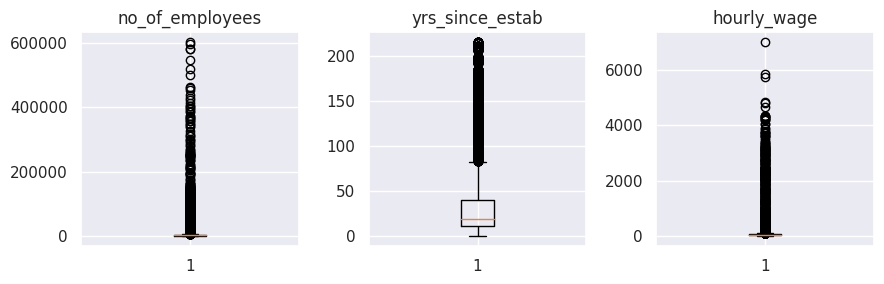

In [ ]:
#Create a list of column names including numeric data
num_cols = data.select_dtypes(include=np.number).columns.tolist()

#Use boxplots with 1.5*IQR whiskers for each numeric variable to detect potential outliers
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

3. **Treatment of Outliers**

The detected upper outliers are replaced with the maximum values of the respective columns in the absence of the outliers.

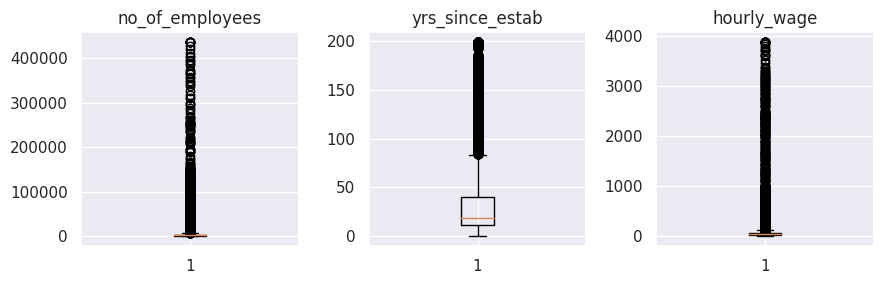

In [ ]:
#Replace outliers in no_of_employees
data.loc[data.no_of_employees > 450000, "no_of_employees"] = data[
    data.no_of_employees <= 450000
].no_of_employees.max()

# Replace outliers in yrs_snc_estab
data.loc[data.yrs_since_estab > 200, 'yrs_since_estab'] = data[
    data.yrs_since_estab <= 200
].yrs_since_estab.max()

# Replace outliers in hourly_wage
data.loc[data.hourly_wage > 4000, 'hourly_wage'] = data[
    data.hourly_wage <= 4000
].hourly_wage.max()

# Use boxplots to check distributions again
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

5. **Other preprocessing steps**

In [ ]:
#Create bins to categorize companies by the size of their overall workforce
bins = [0,1000,2000,3000,4000,np.Inf]
names = ['0-1000','1000-2000','2000-3000','3000-4000','4000+']
#assign each applicant to a category which indicates the size of the company he or she is applying to
data['company_size'] = pd.cut(data['no_of_employees'], bins, labels=names)
data.company_size.value_counts()

0-1000       6208
1000-2000    5915
2000-3000    4978
4000+        4798
3000-4000    3548
Name: company_size, dtype: int64

In [ ]:
#Create bins to categorize companies by the number of years since the company was founded
bins = [0,1966,1986,1996,2006,np.Inf]
names = ['50+','30-50','20-30','10-20','0-10']
#assign each applicant to a category which indicates how long the company has been in business (i.e., a proxy for how well-established the company is)
data['company_age'] = pd.cut(data['yr_of_estab'], bins, labels=names)
data.company_age.value_counts()

10-20    8367
50+      5106
0-10     4849
30-50    3739
20-30    3386
Name: company_age, dtype: int64

# Secondary EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   region_of_employment   25480 non-null  category
 6   unit_of_wage           25480 non-null  category
 7   full_time_position     25480 non-null  category
 8   case_status            25480 non-null  category
 9   yrs_since_estab        25480 non-null  int64   
 10  hourly_wage            25480 non-null  float64 
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


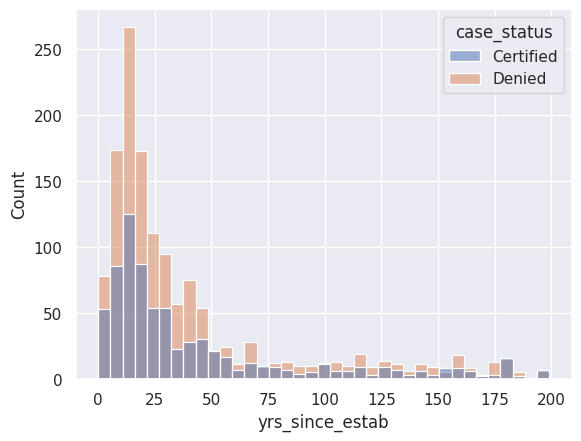

In [ ]:
#Create a dataframe only of workers applying for jobs with a *unit_wage* of 'Hour'
df_hourly = data[data.unit_of_wage=='Hour']
#show a distribution of the *yrs_since_estab* within this dataframe, along with the ratio of *case_status* within each bin
sns.histplot(data=df_hourly, x='yrs_since_estab', hue='case_status')
plt.show()

In [ ]:
#Provide summary statistics of all float64 variables
data.describe(include = ['int64']).T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25447.00,5674.42,22891.84,12.00,1025.00,2112.00,3506.50,602069.00
yr_of_estab,25447.00,1979.39,42.39,1800.00,1976.00,1997.00,2005.00,2016.00


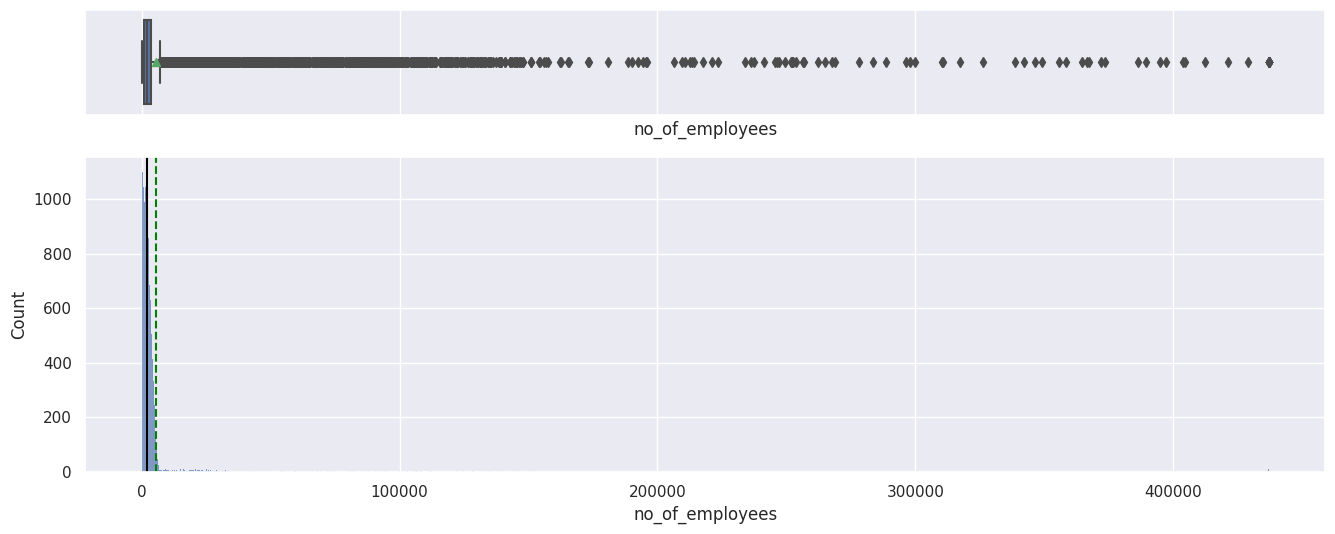

In [ ]:
#Histogram and boxplots
histogram_boxplot(data, 'no_of_employees')

# Observations:
1. The data and graphs above indicate that the distribution of companies by number of employee is heavily right skewed.

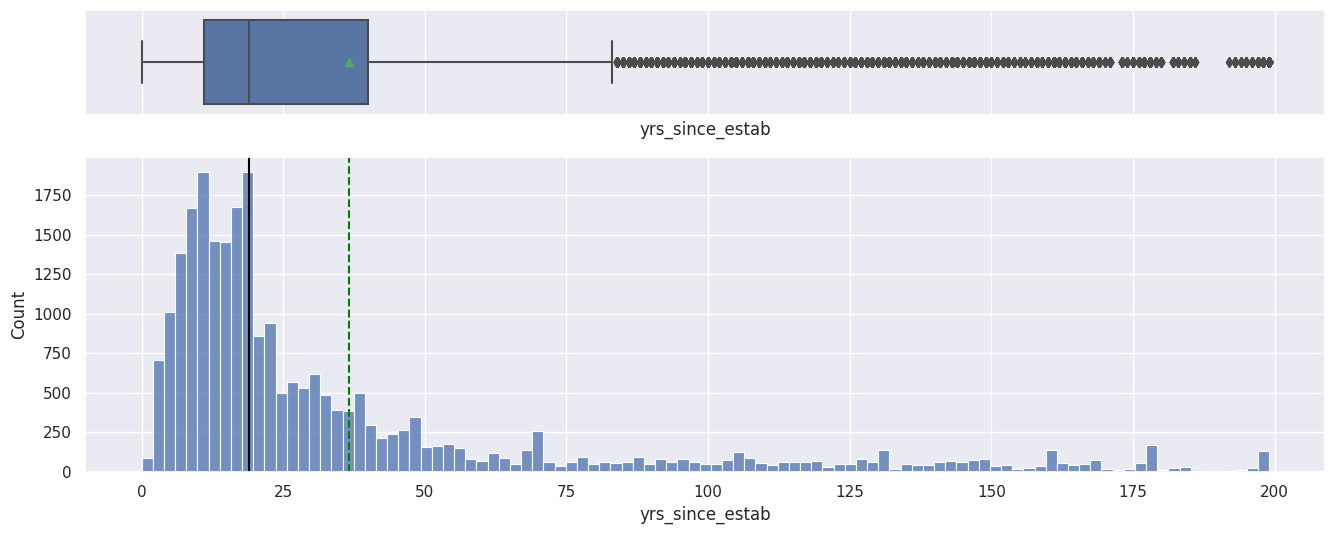

In [ ]:
#Histogram and boxplots
histogram_boxplot(data, 'yrs_since_estab')

# Observations:
1. The data and graphs above indicate that the distribution of companies by year of establishment is heavily left skewed.

In [ ]:
#Provide summary statistics of all float64 variables
df_annual.describe(include = ['float64']).T

,count,mean,std,min,25%,50%,75%,max
hourly_wage,23323.00,64.77,248.94,0.05,21.26,37.08,54.27,3888.14


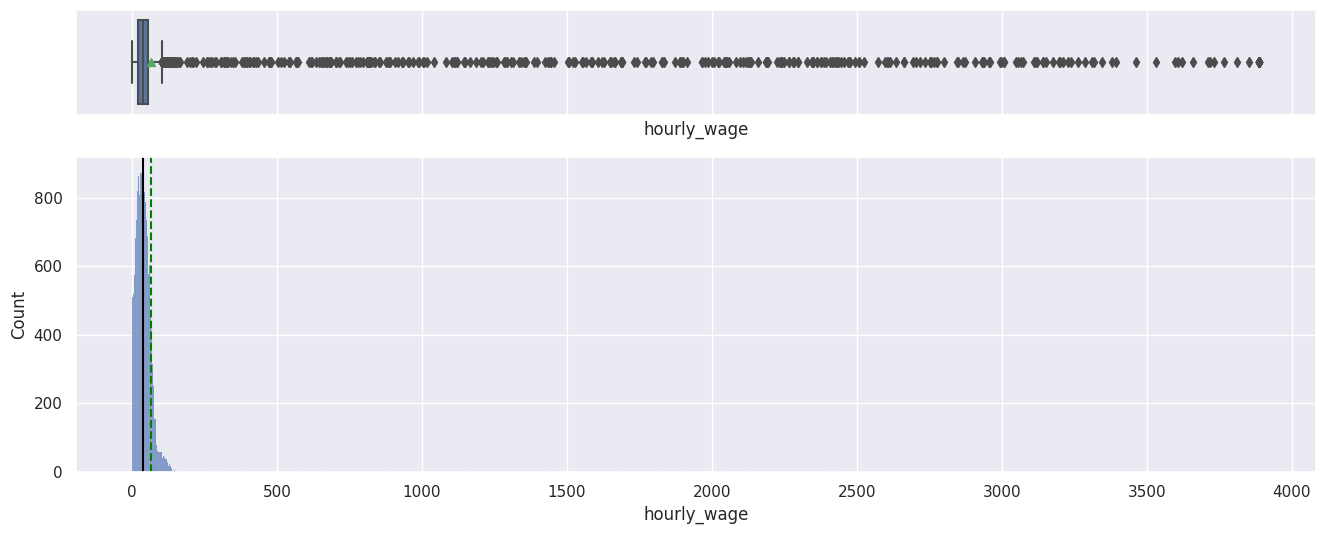

In [ ]:
#Provide histogram and boxplot
histogram_boxplot(df_annual,'hourly_wage')

# Observations:
1. The data and graphs above indicate that the prevaling wage is heavily right skewed.

# Bivariate Analysis

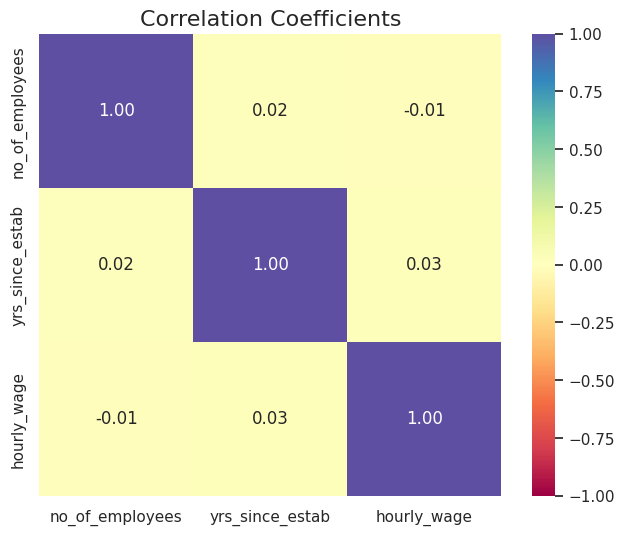

In [ ]:
# Create a list of column names including numeric data
num_cols = data.select_dtypes(include=np.number).columns.tolist()

# Compute correlation coefficients
rhos = data[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))  # set figure size

p = sns.heatmap(
    rhos,
    annot=True,
    square=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)  # create heatmap

p.set_title("Correlation Coefficients", fontsize=16);


continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
All             551  16861    3732           3292      192            852   
Certified       397  11012    2957           2037      122            493   
Denied          154   5849     775           1255       70            359   

continent      All  
case_status         
All          25480  
Certified    17018  
Denied        8462  
------------------------------------------------------------------------------------------------------------------------


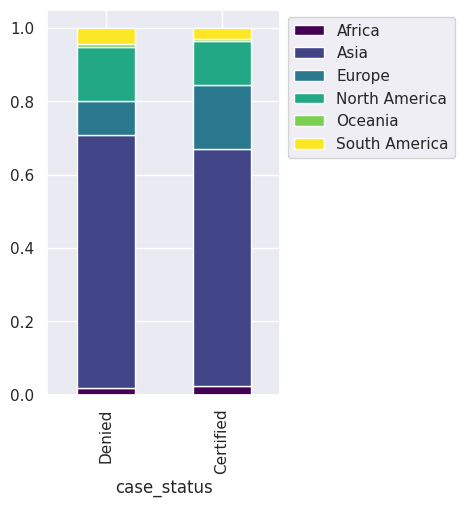

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
case_status                                                               
All                         10234       2192         3420      9634  25480
Certified                    6367       1912         1164      7575  17018
Denied                       3867        280         2256      2059   8462
------------------------------------------------------------------------------------------------------------------------


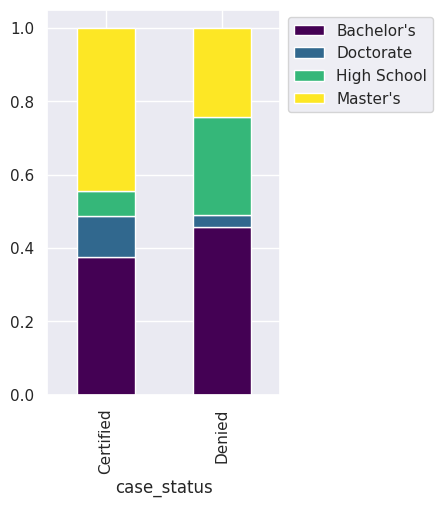

has_job_experience      N      Y    All
case_status                            
All                 10678  14802  25480
Certified            5994  11024  17018
Denied               4684   3778   8462
------------------------------------------------------------------------------------------------------------------------


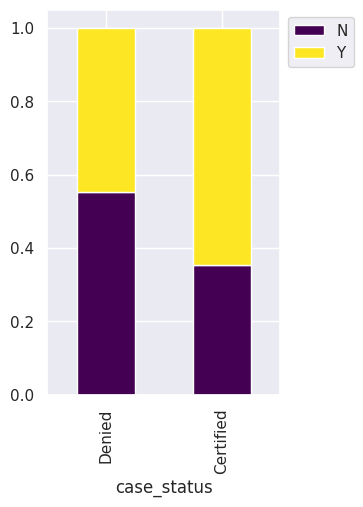

requires_job_training      N     Y    All
case_status                              
All                    22525  2955  25480
Certified              15012  2006  17018
Denied                  7513   949   8462
------------------------------------------------------------------------------------------------------------------------


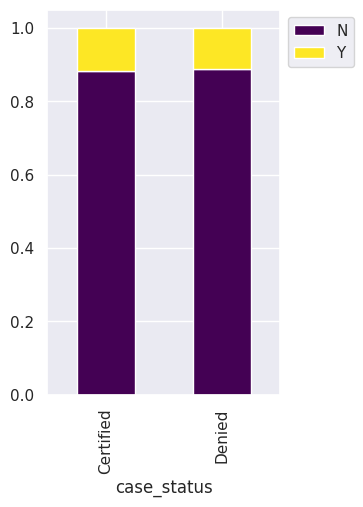

region_of_employment  Island  Midwest  Northeast  South  West    All
case_status                                                         
All                      375     4307       7195   7017  6586  25480
Certified                226     3253       4526   4913  4100  17018
Denied                   149     1054       2669   2104  2486   8462
------------------------------------------------------------------------------------------------------------------------


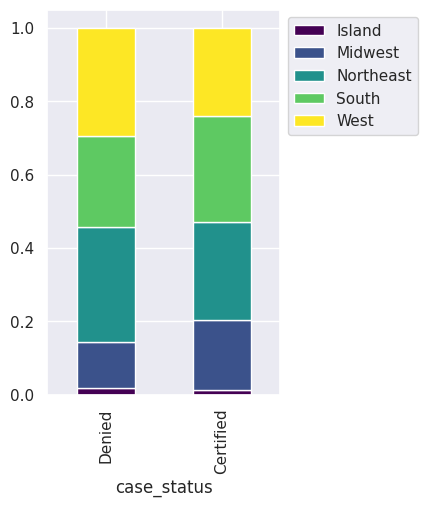

unit_of_wage  Hour  Month  Week   Year    All
case_status                                  
All           2157     89   272  22962  25480
Certified      747     55   169  16047  17018
Denied        1410     34   103   6915   8462
------------------------------------------------------------------------------------------------------------------------


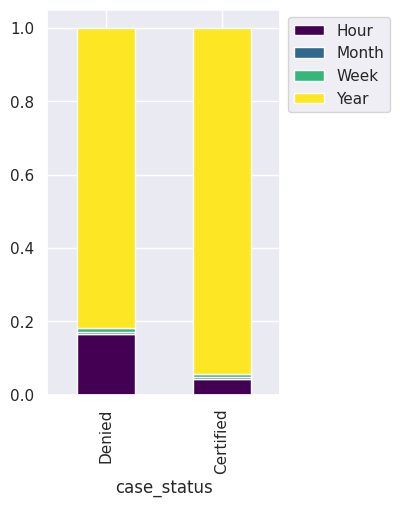

full_time_position     N      Y    All
case_status                           
All                 2707  22773  25480
Certified           1855  15163  17018
Denied               852   7610   8462
------------------------------------------------------------------------------------------------------------------------


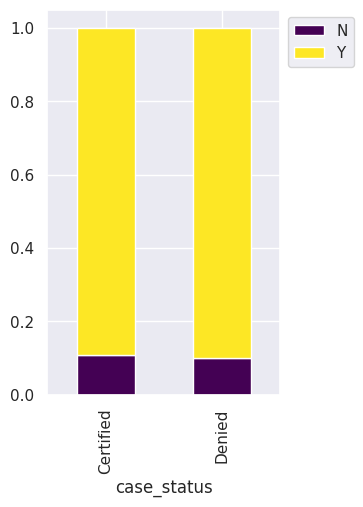

case_status  Certified  Denied    All
case_status                          
Denied               0    8462   8462
All              17018    8462  25480
Certified        17018       0  17018
------------------------------------------------------------------------------------------------------------------------


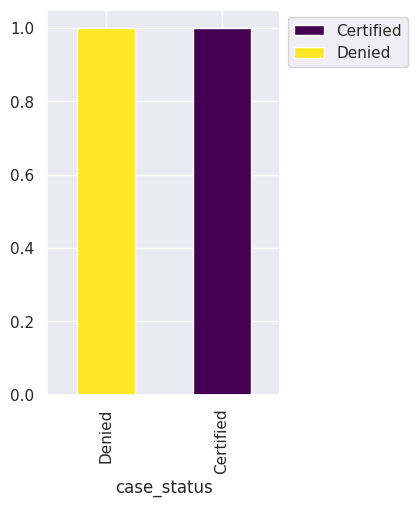

In [ ]:
#Create a table and stacked barplot for each variable with a data type of category by case_status
cols_cat = data.select_dtypes(['category'])
for i in cols_cat.columns:
    stacked_barplot(data, "case_status", i)



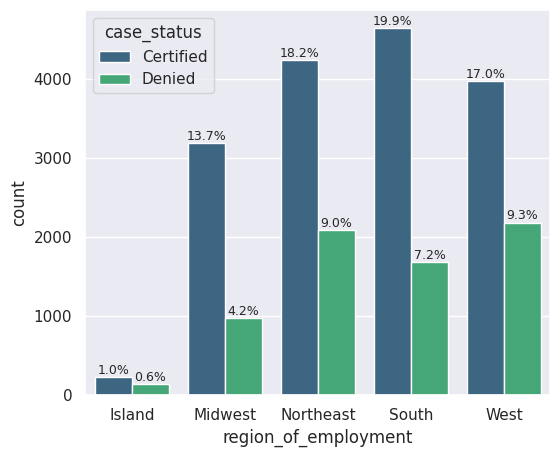

In [ ]:
#Create a barplot of region of employment for an applicant's job with the corresponding percent of approved and denied cases for each
labeled_barplot(df_annual,'region_of_employment','case_status',perc=True,order=None)

# Observations:
1. Jobs that do or does not require training does not affect this ratio.
2. Jobs that are full-time position or not does not affect this ratio.
3. If a job is located in the Midwest or South region, applicants have a higher ratio of approvals than those in the Northeast, West, and particularly the Island region.
4. Jobs that applicants with doctorate degree have the lowest mean prevailing wage of any education.


Text(0.5, 10.249999999999995, 'Training Requirement')

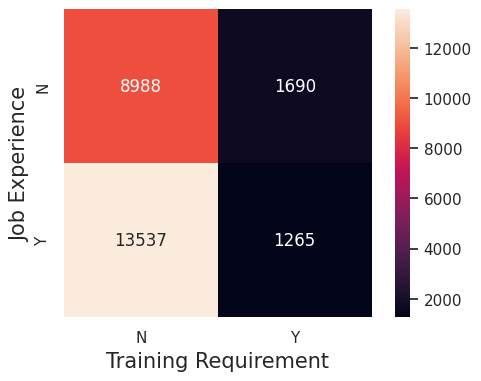

In [ ]:
# Use seaborn heatmap to compare number of applications pivoted on job experience and training requirement

# Create a count pivot table with respect to columns has_job_experience and requires_job_training
pt = data.pivot_table(
    values="case_status",
    index="has_job_experience",
    columns="requires_job_training",
    aggfunc="count",
)

# Plot a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pt, square=True, annot=True, fmt="g")
plt.ylabel("Job Experience", fontsize=15)
plt.xlabel("Training Requirement", fontsize=15)

# Observations:
1. A higher percentage of the applicants who have no job experience require job training than the applicants who have job experience.

In [ ]:
#Preparing data for modeling, Encoding Certified as 1 and Denied as 0
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Building bagging and boosting models

1. Spliting the data
2. We will use 70% of data for training and 30% for testing.


In [ ]:
#Create a dataframe of the predictor feature columns
X = data.drop('case_status',axis=1)
#Create a datafrane of the predicted class (1=True, 0=False)
Y = data['case_status']

#Generate dummy variables for each categorical variable
X = pd.get_dummies(X, drop_first=True)

#Split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
#Confirm the split
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [ ]:
#confirm the shape of both data sets and the ratio of classes is the same across both train and test datasets
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print(' ')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
 
Percentage of classes in training set:
1   0.66
0   0.34
Name: case_status, dtype: float64
 
Percentage of classes in test set:
1   0.68
0   0.32
Name: case_status, dtype: float64


# Model evaluation criterion
Model can make wrong predictions as:
1. Predicting an applicant that should be approved the but the applicant is denied. (False Negative)
2. Predicting an applicant that should be denied and the applicant is approved.(False Positive)

# Which case is more important?
Both are situations are important
1. If an applicant is approved when they should have been denied, an unqualified employee will get a job that should have been filled by a US citizen.
2. If an applicant is denied when they should have been approved, U.S. companies will not be able to fill critical positions and the overall economy will not be as productive.

# How to reduce the losses?

1. Based on the previous analysis, it has been determined that in order to reduce both false positives and false negatives simultaneously, the F1-score could serve as the optimal performance metric for any subsequent models. In other words, the ideal model should aim to maximize the F1-score, while avoiding overfitting or underfitting on the training data


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree Model

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')

In [ ]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

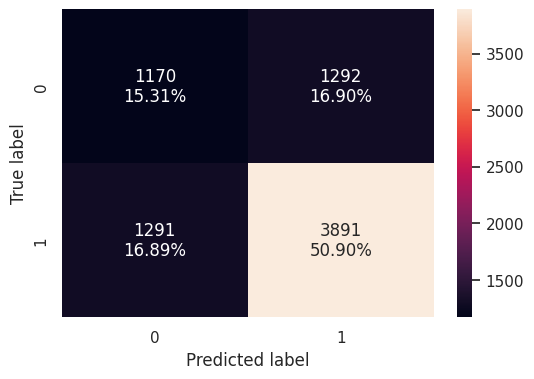

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data.
confusion_matrix_sklearn(dtree, x_test, y_test)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, x_train, y_train)
print("Decision Tree Training performance \n",dtree_model_train_perf)

dtree_model_test_perf=model_performance_classification_sklearn(dtree, x_test, y_test)
print("Decision Tree Testing performance \n",dtree_model_test_perf)

Decision Tree Training performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Decision Tree Testing performance 
    Accuracy  Recall  Precision   F1
0      0.66    0.75       0.75 0.75


#Observations:

1. Although the Decision Tree performs well on the training data, it struggles to generalize on the test data, suggesting that the model is overfitting.

#Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

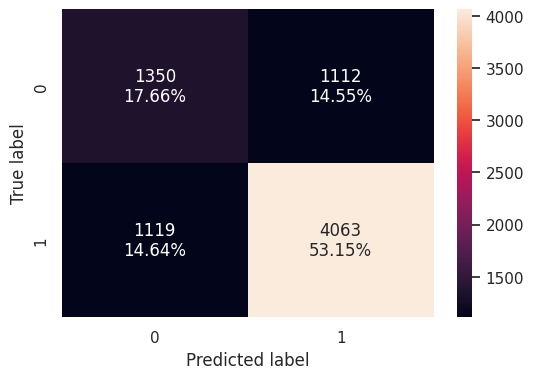

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data.
confusion_matrix_sklearn(bagging, x_test, y_test)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, x_train, y_train)
print("Bagging Training performance \n",bagging_model_train_perf)

bagging_model_test_perf=model_performance_classification_sklearn(bagging, x_test, y_test)
print("Bagging Testing performance \n",bagging_model_test_perf)

Bagging Training performance 
    Accuracy  Recall  Precision   F1
0      0.98    0.99       0.99 0.99
Bagging Testing performance 
    Accuracy  Recall  Precision   F1
0      0.71    0.78       0.79 0.78


#Observations:
1. Like the Decision Tree model, this bagging classifier is overfitting to the training dataset, but it achieves a higher F1 score.

#Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

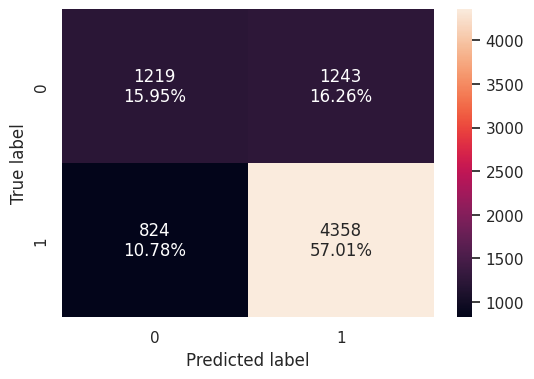

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data.
confusion_matrix_sklearn(rf,x_test,y_test)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,x_train,y_train)
print("Random Forest Training performance \n",rf_model_train_perf)

rf_model_test_perf=model_performance_classification_sklearn(rf,x_test,y_test)
print("Random Forest Testing performance \n",rf_model_test_perf)

Random Forest Training performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Random Forest Testing performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.84       0.78 0.81


#Observations:
1. Similar to the models above, Random Forest is also overfit to the training dataset but has the highest F1 score so far.

# AdaBoost Classifier

In [ ]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

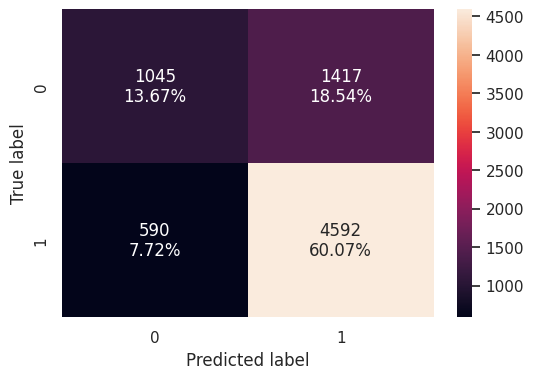

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data.
confusion_matrix_sklearn(ab_classifier, x_test,y_test)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,x_train,y_train)
print("AdaBoost Training performance \n",ab_classifier_model_train_perf)

ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,x_test,y_test)
print("AdaBoost Testing performance \n",ab_classifier_model_test_perf)

AdaBoost Training performance 
    Accuracy  Recall  Precision   F1
0      0.74    0.89       0.76 0.82
AdaBoost Testing performance 
    Accuracy  Recall  Precision   F1
0      0.74    0.89       0.76 0.82


#Observations:
1. The AdaBoost classifer performs equally well on the training and testing datasets, indicating that the model is not overfit.
2. The model performs the best of any model yet with the highest F1 score on this testing data.

#Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

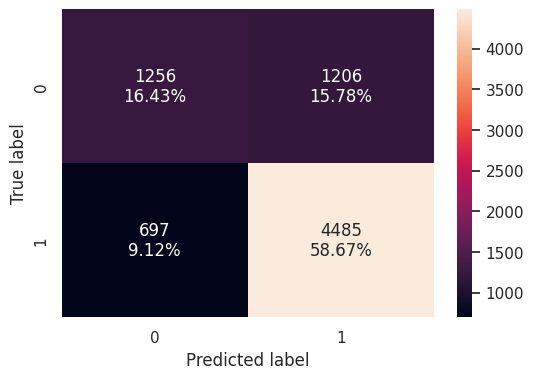

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data.
confusion_matrix_sklearn(gbc, x_test,y_test)

In [ ]:
gbc_classifier_model_train_perf = model_performance_classification_sklearn(gbc,x_train,y_train)
print(" GradientBoosting Training performance \n",gbc_classifier_model_train_perf)

gbc_classifier_model_test_perf = model_performance_classification_sklearn(gbc,x_test,y_test)
print("GradientBoosting Testing performance \n",gbc_classifier_model_test_perf)

 GradientBoosting Training performance 
    Accuracy  Recall  Precision   F1
0      0.75    0.87       0.78 0.83
GradientBoosting Testing performance 
    Accuracy  Recall  Precision   F1
0      0.75    0.87       0.79 0.82


#Observations:
1. Gradient Boosting classifer performs equally well on the training and testing datasets, indicating that the model is not overfit.
2. This model performs even better than the AdaBoost model above.

#XGBoost Classifier

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

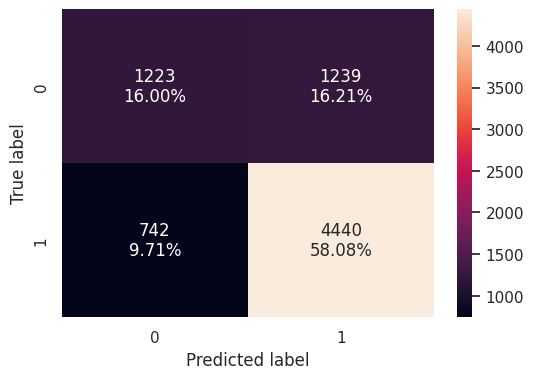

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data.
confusion_matrix_sklearn(xgb, x_test,y_test)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb,x_train,y_train)
print("XGBoost Training performance \n",xgb_classifier_model_train_perf)

xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb,x_test,y_test)
print("XGBoost Testing performance \n",xgb_classifier_model_test_perf)

XGBoost Training performance 
    Accuracy  Recall  Precision   F1
0      0.83    0.92       0.84 0.88
XGBoost Testing performance 
    Accuracy  Recall  Precision   F1
0      0.74    0.86       0.78 0.82


#Oservations:
1. The XGBoost classifer performs equally well on the training and testing datasets, indicating that the model is not overfit.
2. This model performs as well as the AdaBoost model and slightly worse the Gradient Boost model on the test data.

#Model Comparisons

In [ ]:
#Create a dataframe comparing the performance of the base models on the training data

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,
     bagging_model_train_perf.T,
     rf_model_train_perf.T,
     ab_classifier_model_train_perf.T,
     gbc_classifier_model_train_perf.T,
     xgb_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Training performance comparison of base models:")
models_train_comp_df

Training performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,1.00,0.98,1.00,0.74,0.75,0.83
Recall,1.00,0.99,1.00,0.89,0.87,0.92
Precision,1.00,0.99,1.00,0.76,0.78,0.84
F1,1.00,0.99,1.00,0.82,0.83,0.88


In [ ]:
#Create a dataframe comparing the performance of the base models on the testing data

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,
     bagging_model_test_perf.T,
     rf_model_test_perf.T,
     ab_classifier_model_test_perf.T,
     gbc_classifier_model_test_perf.T,
     xgb_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Testing performance comparison of base models:")
models_test_comp_df

Testing performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.66,0.71,0.73,0.74,0.75,0.74
Recall,0.75,0.78,0.84,0.89,0.87,0.86
Precision,0.75,0.79,0.78,0.76,0.79,0.78
F1,0.75,0.78,0.81,0.82,0.82,0.82


#Hyperparameter tuning

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

#Grid of parameters to choose from
parameters = {'max_depth': np.arange(5,30,5),
              'min_samples_leaf': [3, 5, 7],
              'max_leaf_nodes' : [2, 4, 6],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

#Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

#Fit the best algorithm to the data.
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

In [ ]:
#Tuning Decision Tree

#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

#Grid of parameters to choose from
parameters = {'max_depth': np.arange(5,30,5),
              'min_samples_leaf': [3, 5, 7],
              'max_leaf_nodes' : [2, 4, 6],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

#Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

#Fit the best algorithm to the data.
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

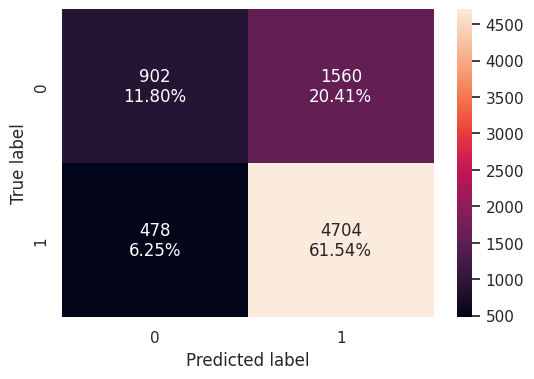

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data
confusion_matrix_sklearn(dtree_estimator, x_test,y_test)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, x_train,y_train)
print("Tuning Decision Tree Training performance \n",dtree_estimator_model_train_perf)

dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, x_test, y_test)
print("Tuning Decision Tree Testing performance \n",dtree_estimator_model_test_perf)

Tuning Decision Tree Training performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.74 0.81
Tuning Decision Tree Testing performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.75 0.82


#Observations:
1. The Decision Tree model after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
2. This model performs as well as two out of the three boosting models above on the test data.
3. Both of these indicate this tuned model is a significant improvements over the base model.

In [ ]:
#Tuning Bagging Classifier

#Random search for bagging classifier
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : np.arange(50, 100, 10)
             }

#Run the randomized search
rand_bag = RandomizedSearchCV(BaggingClassifier(random_state=1,bootstrap=True),
                              parameters, scoring = 'f1', cv = 5, random_state=1)
rand_bag = rand_bag.fit(x_train, y_train)

#Set the clf to the best combination of parameters
bag_tuned = rand_bag.best_estimator_

#Fit the best algorithm to the data
bag_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=70,
                  random_state=1)

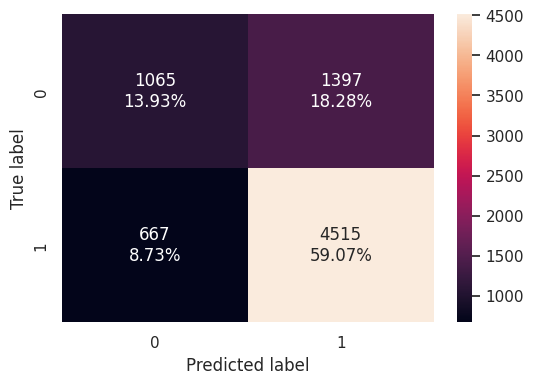

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data
confusion_matrix_sklearn(bag_tuned, x_test,y_test)

In [ ]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bag_tuned, x_train,y_train)
print("Tuning Bagging Training performance \n",bagging_estimator_model_train_perf)

bagging_estimator_model_test_perf=model_performance_classification_sklearn(bag_tuned, x_test, y_test)
print("Tuning Bagging Testing performance \n",bagging_estimator_model_test_perf)


Tuning Bagging Training performance 
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Tuning Bagging Testing performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.87       0.76 0.81


#Observations:
1. The tuned Bagging Classifier performs poorer on the test data than on the training data, indicating that the model is still overfit.
2. This model does however perform better than the base model.

In [ ]:
#Tuning Random Forest

#Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10, 40, 10),
              "min_samples_leaf": np.arange(5, 10),
              "min_samples_split": [3, 5, 7],
              "max_features": ["sqrt", "log2"],
              "max_samples": np.arange(0.3, 0.7, 0.1),
}

#Run the randomized search
rand_rf = RandomizedSearchCV(rf_estimator, parameters, scoring='f1', cv=5, n_jobs=-1, random_state=1)
rand_rf = grid_obj.fit(x_train, y_train)

#Set the clf to the best combination of parameters
rf_estimator = rand_rf.best_estimator_

#Fit the best algorithm to the data.
rf_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

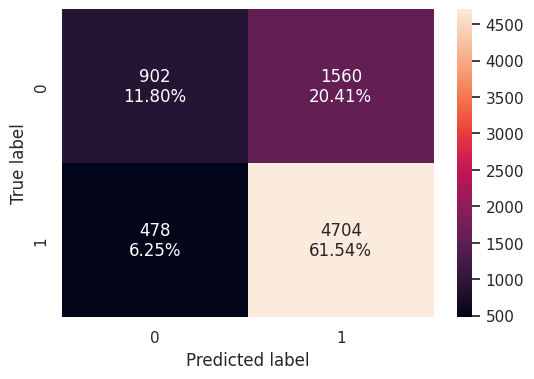

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data
confusion_matrix_sklearn(rf_estimator, x_test,y_test)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Tuning Random Training performance \n",rf_estimator_model_train_perf)

rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Tuning Random Testing performance \n",rf_estimator_model_test_perf)

Tuning Random Training performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.74 0.81
Tuning Random Testing performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.75 0.82


#Observations:
1. The Random Forest after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
2. This model performs as well as two out of the three boosting models and the tuned Decision Tree on the test data.
3. Both of these indicate this tuned model is a significant improvements over the base model.

In [ ]:
#Tuning AdaBoost Classifier

#base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
#n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
#learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

#Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

#Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=2, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=3, random_state=1, class_weight='balanced')],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

#Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

#Run the randomized search
rand_abc = RandomizedSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1, random_state=1)
rand_abc = rand_abc.fit(x_train, y_train)

#Set the clf to the best combination of parameters
abc_tuned = rand_abc.best_estimator_

#Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.5, n_estimators=20, random_state=1)

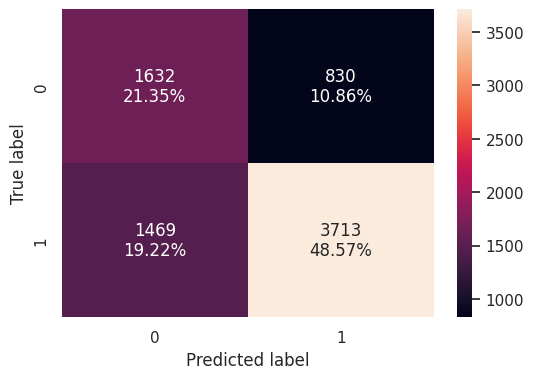

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data
confusion_matrix_sklearn(abc_tuned, x_test,y_test)

In [ ]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, x_train,y_train)
print("Tuning AdaBoost Training performance \n",abc_tuned_model_train_perf)

abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, x_test, y_test)
print("Tuning AdaBoost Testing performance \n",abc_tuned_model_test_perf)

Tuning AdaBoost Training performance 
    Accuracy  Recall  Precision   F1
0      0.70    0.71       0.81 0.76
Tuning AdaBoost Testing performance 
    Accuracy  Recall  Precision   F1
0      0.70    0.72       0.82 0.76


#Observations:
1. The AdaBoost classifier after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
2. This model, however, performs worse than the base model on both the training and testing data.

In [ ]:
#Tuning GradientBoost Classifier
#init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
#There is no class_weights parameter in gradient boosting.

#Choose the type of classifier.
gb_tuned = GradientBoostingClassifier(random_state=1)

#Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250,300],
              "subsample":[0.8,0.9,1],
              "max_features":[0.7,0.8,0.9,1],
              "learning_rate": np.arange(0.1, 0.4, 0.1)}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Run the randomized search
rand_gb = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_gb = rand_gb.fit(x_train, y_train)

#Set the clf to the best combination of parameters
gb_tuned = rand_gb.best_estimator_

#Fit the best algorithm to the data.
gb_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=0.9, n_estimators=300, random_state=1,
                           subsample=1)

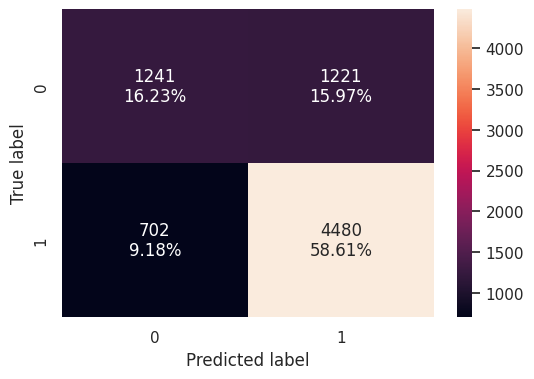

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data
confusion_matrix_sklearn(gb_tuned, x_test,y_test)

In [ ]:
gb_tuned_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Tuning Gradient Boost Training performance \n",gb_tuned_model_train_perf)

gb_tuned_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Tuning Gradient BoostTesting performance \n",gb_tuned_model_test_perf)

Tuning Gradient Boost Training performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.74 0.81
Tuning Gradient BoostTesting performance 
    Accuracy  Recall  Precision   F1
0      0.73    0.91       0.75 0.82


#Oservations:
1. The Gradient Boosting classifier after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
2. This model performs slightly worse than the base model on both the train and test data.

In [ ]:
#Tuning XGB Classifer

#scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to infinity
#subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
#colsample_bytree: Corresponds to the fraction of features (the columns) to use.
#colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
#colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
#max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
#learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
#gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

#Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

#Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10,100,20),
              "scale_pos_weight":[0,1,2,5],
              "subsample":[0.5,0.7,0.9,1],
              "learning_rate":[0.01,0.1,0.2,0.05],
              "gamma":[0,1,3],
              "colsample_bytree":[0.5,0.7,0.9,1],
              "colsample_bylevel":[0.5,0.7,0.9,1]}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Run the randomized search
rand_xgb = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_xgb = rand_xgb.fit(x_train, y_train)

#Set the clf to the best combination of parameters
xgb_tuned = rand_xgb.best_estimator_

#Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

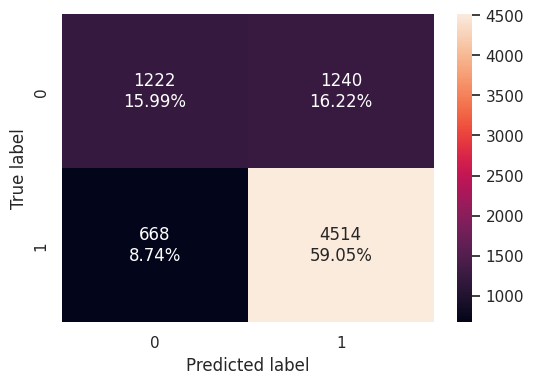

In [ ]:
#Generate a confusion matrix that depicts the performance of the classifier on the testing data
confusion_matrix_sklearn(xgb_tuned, x_test,y_test)

In [ ]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned, x_train,y_train)
print("Tuning XGB Training performance \n",xgb_tuned_model_train_perf)

xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned, x_test, y_test)
print("Tuning XGB Testing performance \n",xgb_tuned_model_test_perf)

Tuning XGB Training performance 
    Accuracy  Recall  Precision   F1
0      0.77    0.89       0.79 0.84
Tuning XGB Testing performance 
    Accuracy  Recall  Precision   F1
0      0.75    0.87       0.78 0.83


#Observations:
1. The XGBoost classifier after tuning is less overfit than the base model, but performs equally well on the test data.
2. This indicates a minor improvement over the base model.

#Tuned Model Comparisons

In [ ]:
#Create a dataframe comparing the performance of the tuned models on the training data

tuned_models_train_comp_df = pd.concat(
    [dtree_estimator_model_train_perf.T,
     bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T,
     abc_tuned_model_train_perf.T,
     gb_tuned_model_train_perf.T,
     xgb_tuned_model_train_perf.T],
    axis=1,
)
tuned_models_train_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Training performance comparison of tuned models:")
tuned_models_train_comp_df

Training performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.73,1.00,0.73,0.70,0.73,0.77
Recall,0.91,1.00,0.91,0.71,0.91,0.89
Precision,0.74,1.00,0.74,0.81,0.74,0.79
F1,0.81,1.00,0.81,0.76,0.81,0.84


In [ ]:
#Create a dataframe comparing the performance of the tuned models on the testing data

tuned_models_test_comp_df = pd.concat(
    [dtree_estimator_model_test_perf.T,
     bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,
     abc_tuned_model_test_perf.T,
     gb_tuned_model_test_perf.T,
     xgb_tuned_model_test_perf.T],
    axis=1,
)
tuned_models_test_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Testing performance comparison of tuned models:")
tuned_models_test_comp_df

Testing performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.73,0.73,0.73,0.70,0.73,0.75
Recall,0.91,0.87,0.91,0.72,0.91,0.87
Precision,0.75,0.76,0.75,0.82,0.75,0.78
F1,0.82,0.81,0.82,0.76,0.82,0.83


In [ ]:
#Create a dataframe comparing the performance all models on the training data
all_models_train_comp = pd.concat([models_train_comp_df,tuned_models_train_comp_df],axis=1)
all_models_train_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Decision Tree,1.00,1.00,1.00,1.00
Random Forest,1.00,1.00,1.00,1.00
Tuned Bagging Classifier,1.00,1.00,1.00,1.00
Bagging Classifier,0.98,0.99,0.99,0.99
XGBoost Classifier,0.83,0.92,0.84,0.88
Tuned XGBoost Classifier,0.77,0.89,0.79,0.84
Gradient Boosting Classifier,0.75,0.87,0.78,0.83
AdaBoost Classifier,0.74,0.89,0.76,0.82
Tuned Decision Tree,0.73,0.91,0.74,0.81
Tuned Random Forest,0.73,0.91,0.74,0.81


In [ ]:
#Create a dataframe comparing the performance of all models on the testing data
all_models_test_comp = pd.concat([models_test_comp_df,tuned_models_test_comp_df],axis=1)
all_models_test_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Tuned XGBoost Classifier,0.75,0.87,0.78,0.83
Gradient Boosting Classifier,0.75,0.87,0.79,0.82
Tuned Decision Tree,0.73,0.91,0.75,0.82
Tuned Random Forest,0.73,0.91,0.75,0.82
Tuned Gradient Boosting Classifier,0.73,0.91,0.75,0.82
AdaBoost Classifier,0.74,0.89,0.76,0.82
XGBoost Classifier,0.74,0.86,0.78,0.82
Tuned Bagging Classifier,0.73,0.87,0.76,0.81
Random Forest,0.73,0.84,0.78,0.81
Bagging Classifier,0.71,0.78,0.79,0.78


In [ ]:
'The best performing model on the testing data is the ' + all_models_test_comp.T.sort_values('F1',ascending=False).index[0]

'The best performing model on the testing data is the Tuned XGBoost Classifier'

# Observations
1.As anticipated, the Decision Tree model exhibits superior performance on the training dataset, given that it tends to overfit the data unless pruned appropriately.
2.  Gradient Boosting classifier performed the best on the testing dataset with a 0.83 F1 score.
3. Interestingly, six models tied for the second with an F1 score of 0.82.

# Feature Importance

In [ ]:
"""The importance of features in the tree building
(The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(gbc.feature_importances_, columns = ["Imp"],
                   index = x_train.columns).sort_values(by = 'Imp', ascending = False).head(10))


                                   Imp
education_of_employee_High School 0.28
has_job_experience_Y              0.17
unit_of_wage_Year                 0.13
education_of_employee_Master's    0.09
education_of_employee_Doctorate   0.08
continent_Europe                  0.06
region_of_employment_Midwest      0.03
hourly_wage                       0.03
region_of_employment_West         0.02
continent_North America           0.02


In [ ]:
feature_names = x_train.columns

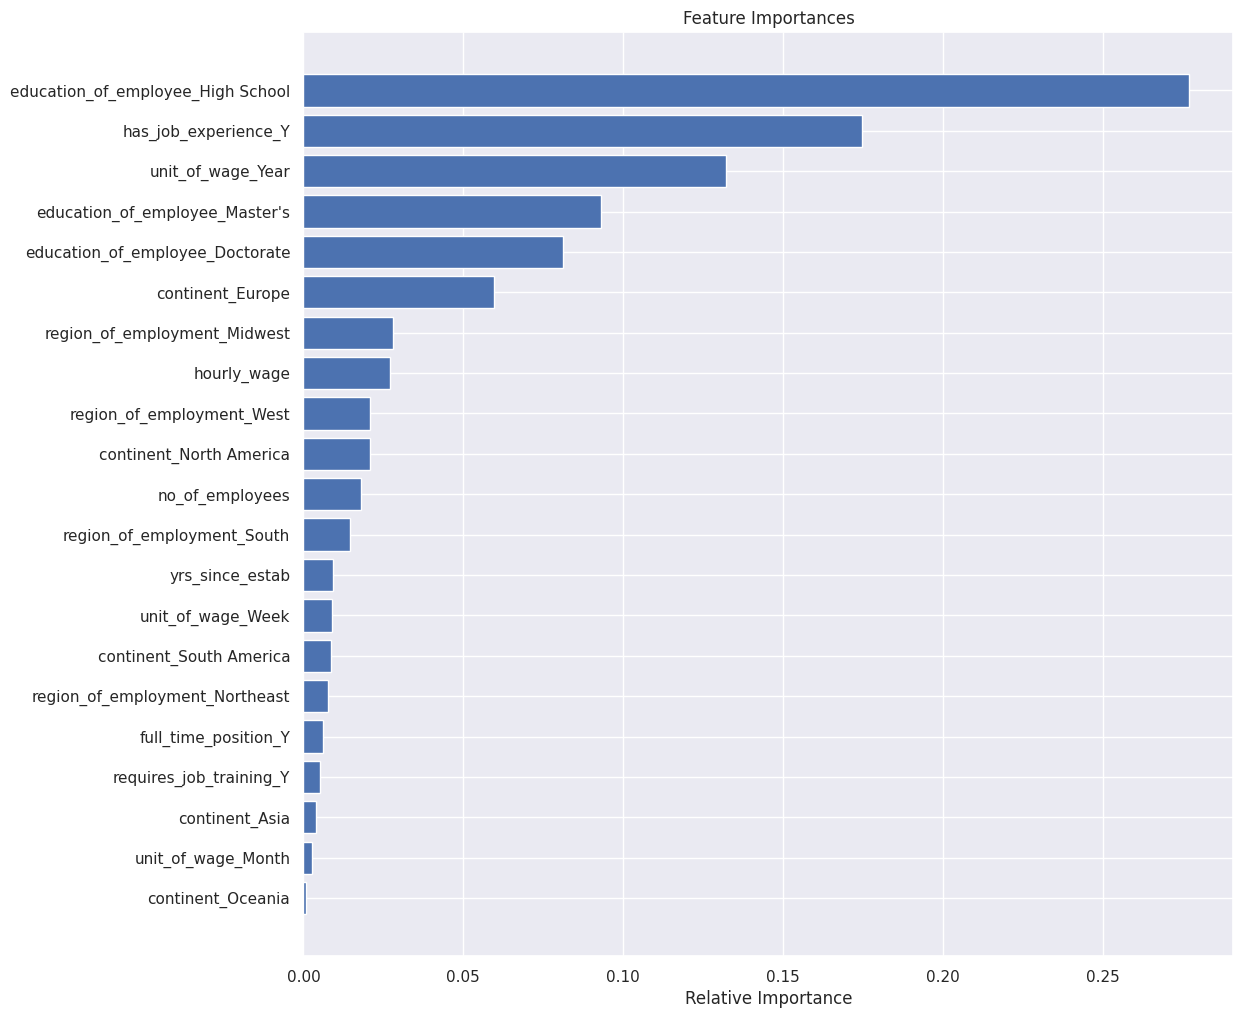

In [ ]:
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

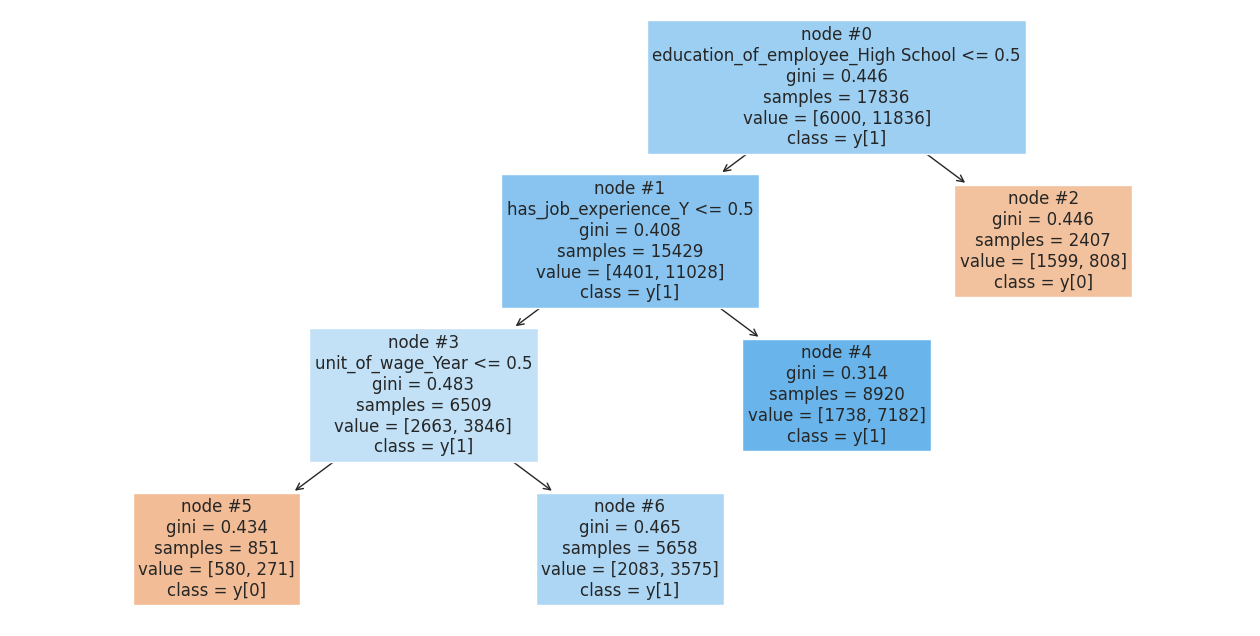

In [ ]:
#Create visualization of tuned decision-tree model
from sklearn import tree
feature_names = list(X.columns)
plt.figure(figsize=(16,8))
tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

#Conclusions

Insights

Three components are  crucial for pre-screening a job applicant:

1. Education level: An applicant seeking a job that requires a high school diploma is likely to be denied, while those applying for positions that require a Master's degree or doctorate are more likely to be approved.
2. Prior job experience: Applicants without previous job experience are more likely to be denied than those with relevant experience.
3. Prevailing wage: Applications for jobs with higher prevailing wages, particularly those with an hourly wage rate, are more likely to be approved.

Other Insights
1. Sixty six percent of work visa applications are from Asia.
2. Fifty eight percent of the applicants have job experience.
3. Eighty eight percent of offerred jobs do not require training.
4. Eighty nine percent of the offered positions are full-time.
5. The probability of visa certification increases with job experience.
6. Visa applications for employment in the Midwest region are more likely to be approved than those for employment in other regions.
7. The majority of employers applying for work visas are less than 40 years old.
8. The likelihood of visa certification is not noticeably affected by whether the position is full-time or part-time.
9. The age of an employer has a minimal impact on the probability of visa
certification.

Recommendations:

To optimize the use of limited resources in screening a batch of applications and prioritize those that are most likely to be approved, the OFLC can:
  1. One approach for the OFLC to prioritize applications is to sort them by level of education and start reviewing the higher levels of education first.
  2. To prioritize the applications, the OFLC can sort them based on previous job experience and begin reviewing the ones with relevant experience first.
  3. To prioritize the applications for jobs, the OFLC can divide them into two groups: those with an hourly wage and those with an annual wage. Then, within each group, the applications can be sorted by the prevailing wage. Finally, the OFLC can begin reviewing the applications for salaried jobs, starting with the ones with the highest wage and working down to the lowest.
  4. To prevent a workforce shortage in high-demand industries that rely on foreign employees, it is advisable for the OFLC to prioritize visa application processing based on the developed classification models that predict the applications with a higher probability of certification.
  5. It is advisable to include other potentially significant variables such as the industry of employment, the applicant's years of experience, the relevance of the applicant's qualifications to the job, and the employer's socioeconomic contributions to the US in the development of the classification model.
  6. Based on the insights mentioned above, the OFLC should prioritize the level of education, job experience, and prevailing wage unit when estimating the probability of visa certification. Applicants with higher education, job experience, and an employment wage unit of year are more likely to be certified for a work visa. In certain cases, being from Europe can also increase the chances of visa certification.
